# Rented Apartment with Machine Learning Analysis

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import re
import csv

# Scrape posts in ImmobilienScout24 via BeutifulSoup

In [11]:
# Collect first page of list
# list_of_pages = requests.get("https://www.immobilienscout24.de/Suche/S-T/Wohnung-Miete/Fahrzeitsuche/Frankfurt_20am_20Main/-/-95993/2244895/-/1276007004/60?enteredFrom=result_list")

# Create a BeautifulSoup object
# soup_for_list = BeautifulSoup(list_of_pages.text, 'html.parser')


result = []
header = ["type_of_house", "living_space", "number_of_rooms", "rent", "construction_year", "street", "zipcode", "region", "tag"]
result.append(header)

def page_spider():
    for i in range(0, 143):
        link = "https://www.immobilienscout24.de/Suche/S-"
        link += str(i)
        link += "/Wohnung-Miete/Fahrzeitsuche/Frankfurt_20am_20Main/-/-95993/2244895/-/1276007004/60?enteredFrom=result_list"
        page = requests.get(link)
        soup_for_list = BeautifulSoup(page.text, 'html.parser')
        list_spider(soup_for_list)

def list_spider(soup_for_list):
    lst = []
    for paragraph in soup_for_list.find_all('a'):
        if '/expose/' in str(paragraph.get("href")):
            lst.append(paragraph.get('href'))

    lst = list(set(lst))

    for item in lst:
        page = requests.get("https://www.immobilienscout24.de"+item)
        soup = BeautifulSoup(page.text, 'html.parser')

        try:
            type_of_house = soup.find(class_= 'is24qa-typ grid-item three-fifths').text.strip()
        except:
            type_of_house = ''
        try:
            living_space = soup.find(class_='is24qa-wohnflaeche-ca').text.strip()
        except:
            living_space = ''
        try:
            number_of_rooms = int(soup.find(class_='is24qa-zimmer grid-item three-fifths').text.strip())
        except:
            number_of_rooms = ''
        try:
            rent = soup.find(class_='is24qa-gesamtmiete').text.strip()
        except:
            rent = ''
        try:
            construction_year = soup.find(class_='is24qa-baujahr').text.strip()
        except:
            construction_year = ''
        try:
            street = soup.find(class_='block font-nowrap print-hide').text.strip().rstrip(',')
        except:
            street = ''
        try:
            zip_region = soup.find(class_='zip-region-and-country').text.strip()
            zipcode = re.sub('[^\d]+', '', zip_region).strip()
            region = re.sub('[\d]+', '', zip_region).strip()
        except:
            zipcode = ''
            region = ''

        living_space = int(re.sub('[^\d,]+','',living_space).split(",")[0])
        rent = int(re.sub('[^\d,]+', '', rent).split(",")[0])

        new_list = [type_of_house, living_space, number_of_rooms, rent, construction_year, street, zipcode, region, item]
        result.append(new_list)

    with open("ffm-rents.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer = writer.writerows(result)

page_spider()

# Add two columns (longtitude, latitude) in DataFrame via outsourcing API

In [ ]:
import requests 
import urllib.parse
import pandas as pd 
from time import sleep

df = pd.read_csv("ffm-rents.csv", nrows = 2450)
URL1 = 'https://api.opencagedata.com/geocode/v1/json?q='
URL3 = '&key=71b9900ab09246f99610ef8cfb212c2e&language=en&pretty=1'
lst_lat = []
lst_lng = []

for index, row in df.iterrows():
    #query = str(row['street']) +  ", " + str(row['zipcode']) + ", " + str(row['region'])
    #URL2 = urllib.parse.quote(query)
    #r = requests.get(URL1+URL2+URL3)
    data = r.json()
    try: 
        latitude = data['results'][0]['geometry']['lat']
        longitude = data['results'][0]['geometry']['lng']
    except: 
        latitude = ''
        longitude = ''
    lst_lat.append(latitude)
    lst_lng.append(longitude)
    sleep(1)
df["latitude"] = lst_lat
df["longitude"] = lst_lat
df


# First five rows of data

In [50]:
import pandas as pd 
df = pd.read_csv("ffm-rents.csv", sep=",", index_col=0)
df.head()

,total_rent,living_space,nr_of_rooms,building_type,age_of_building,zip_code,region,street,latitude,longitude
0,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
1,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
2,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
3,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283
4,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283


In [51]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


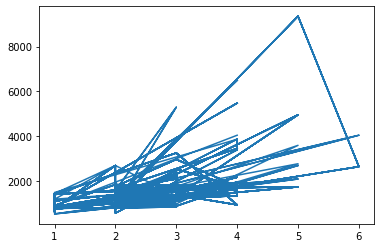

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

#visualize data
axis_x = df["nr_of_rooms"]
axis_y = df["total_rent"]
plt.plot(axis_x, axis_y)
plt.show()


In [53]:
# make a list of missing value
missing_value = ["NaN", "unbekannt", ""]
df = pd.read_csv("ffm-rents.csv", na_values = missing_value)
df.columns = ['index', 'total_rent', 'living_space', 'nr_of_rooms', 'building_type', 'age_of_building', 'zip_code', 'region', 'street', 'latitude', 'longitude']
df.head()

,index,total_rent,living_space,nr_of_rooms,building_type,age_of_building,zip_code,region,street,latitude,longitude
0,0,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
1,1,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
2,2,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
3,3,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283
4,4,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283


In [54]:
# replace NaN with Median
median = df['nr_of_rooms'].median()
df['nr_of_rooms'].fillna(median, inplace=True)
df.head()

,index,total_rent,living_space,nr_of_rooms,building_type,age_of_building,zip_code,region,street,latitude,longitude
0,0,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
1,1,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
2,2,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
3,3,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283
4,4,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283


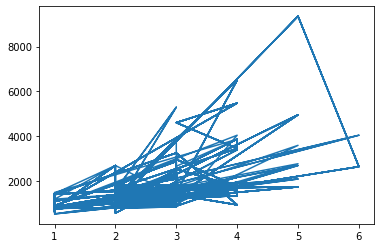

In [55]:
axis_x = df["nr_of_rooms"]
axis_y = df["total_rent"]
plt.plot(axis_x, axis_y)
plt.show()

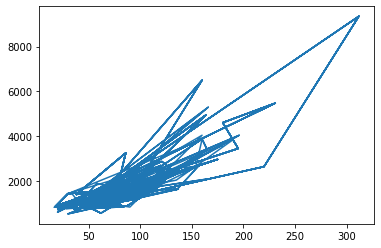

In [56]:
axis_x = df["living_space"]
axis_y = df["total_rent"]
plt.plot(axis_x, axis_y)
plt.show()

# Create a Test Set

In [57]:
model = sklearn.linear_model.LinearRegression()
axis_x = np.c_[df['nr_of_rooms']]
axis_y = np.c_[df['total_rent']]
model.fit(axis_x,axis_y)
new_x1 = [[1]]
new_x2 = [[2]]
new_x3 = [[3]]
new_x4 = [[4]]
new_x5 = [[5]]
print("One room: ", model.predict(new_x1))
print("Two rooms: ", model.predict(new_x2))
print("Three rooms: ", model.predict(new_x3))
print("Four rooms: ", model.predict(new_x4))
print("Five rooms: ", model.predict(new_x5))

One room:  [[730.00036338]]
Two rooms:  [[1355.30113321]]
Three rooms:  [[1980.60190304]]
Four rooms:  [[2605.90267287]]
Five rooms:  [[3231.2034427]]


In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(axis_x,axis_y.ravel())
new_x1 = [[1]]
new_x2 = [[2]]
new_x3 = [[3]]
new_x4 = [[4]]
new_x5 = [[5]]
print("One room: ", model.predict(new_x1))
print("Two rooms: ", model.predict(new_x2))
print("Three rooms: ", model.predict(new_x3))
print("Four rooms: ", model.predict(new_x4))
print("Five rooms: ", model.predict(new_x5))

One room:  [630]
Two rooms:  [580]
Three rooms:  [1195]
Four rooms:  [2180]
Five rooms:  [2700]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123c92a90>,
      dtype=object)

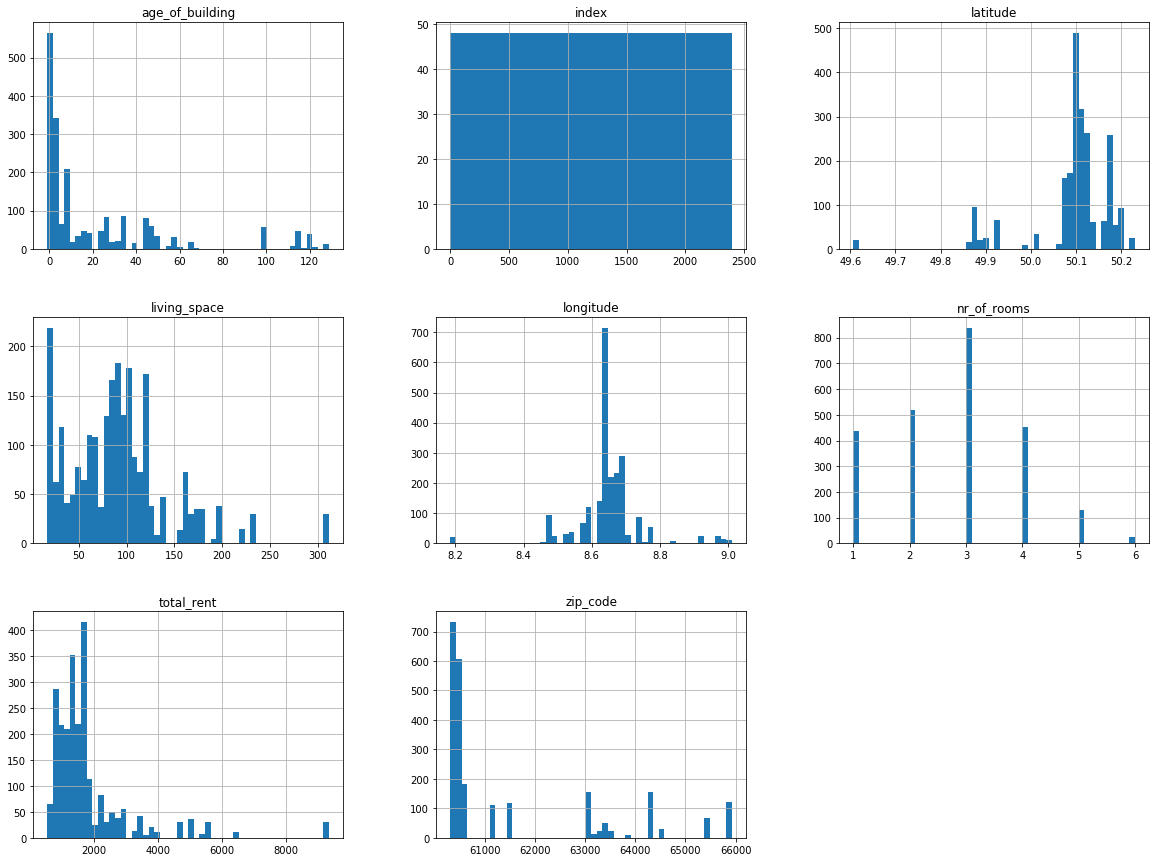

In [59]:
df.hist(bins=50, figsize=(20,15))

In [60]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set))
print(len(test_set))

1920
480


In [61]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32
def split_train_set_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id: test_set_check(id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
train_set, test_set = split_train_set_by_id(df, 0.2, "index")

In [62]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

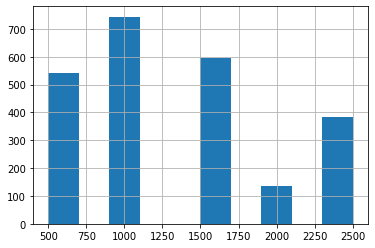

In [63]:
df['rent_category'] = pd.cut(df['total_rent'], bins=[0, 500, 1000, 1500, 2000, 2500, np.inf],
                                            labels=[0, 500, 1000, 1500, 2000, 2500])
df['rent_category'].hist()

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['rent_category']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
strat_test_set['rent_category'].value_counts()/len(strat_test_set)

1000    0.310417
1500    0.247917
500     0.225000
2500    0.160417
2000    0.056250
0       0.000000
Name: rent_category, dtype: float64

In [65]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('rent_category', axis=1, inplace=True)

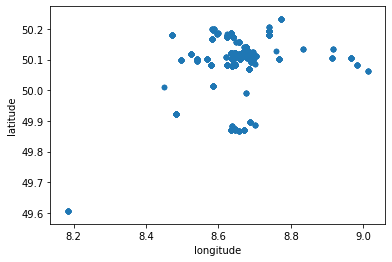

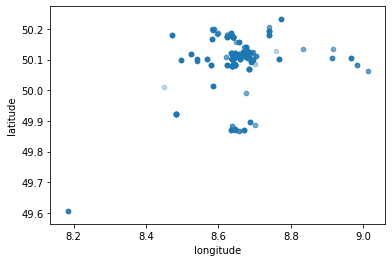

In [66]:
df.plot(kind='scatter', x='longitude', y='latitude')
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

# Visualization of Geographical Data

Text(0.5, 1.0, 'House Prices\n(Red X: Frankfurt Hauptbahnhof - Yellow X: Darmstadt Luisenplatz)')

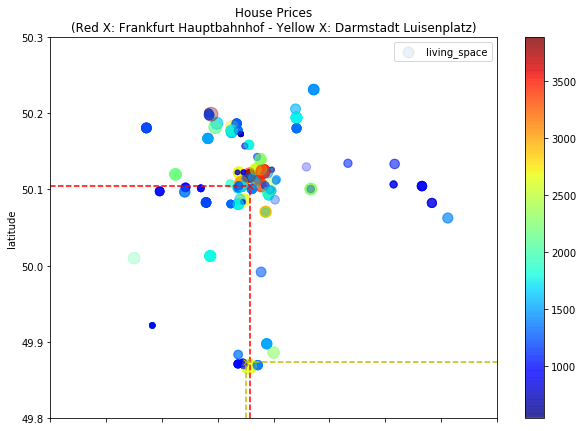

In [67]:
df = df[df['total_rent'] <= 4000]
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
        figsize=(10,7), s = df['living_space'], label='living_space',
        c= df['total_rent'], cmap=plt.get_cmap('jet',5000), colorbar=True)
plt.legend()
plt.axis([8.3, 9.1, 49.8, 50.3])

# Frankfurt Hauptbahnhof
plt.plot([8.65749737], [50.10416625], 'rx')
plt.plot([8.65749737, 8.65749737], [49.8, 50.10416625], 'r--')
plt.plot([8.3, 8.65749737], [50.10416625, 50.10416625], 'r--')

# Darmstadt Luisenplatz
plt.plot([8.651180], [49.872768], 'yx')
plt.plot([8.651180, 8.651180], [49.8, 49.872768], 'y--')
plt.plot([8.651180, 9.1], [49.872768, 49.872768], 'y--')

plt.axis([8.3, 9.1, 49.8, 50.3])
plt.gca().set_title('House Prices\n(Red X: Frankfurt Hauptbahnhof - Yellow X: Darmstadt Luisenplatz)')

In [68]:
corr_matrix = df.corr()
corr_matrix['total_rent'].sort_values(ascending=False)

total_rent         1.000000
living_space       0.832353
nr_of_rooms        0.567758
latitude           0.133183
longitude          0.083517
age_of_building    0.047954
index              0.000718
zip_code          -0.235943
Name: total_rent, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124027190>,
      dtype=object)

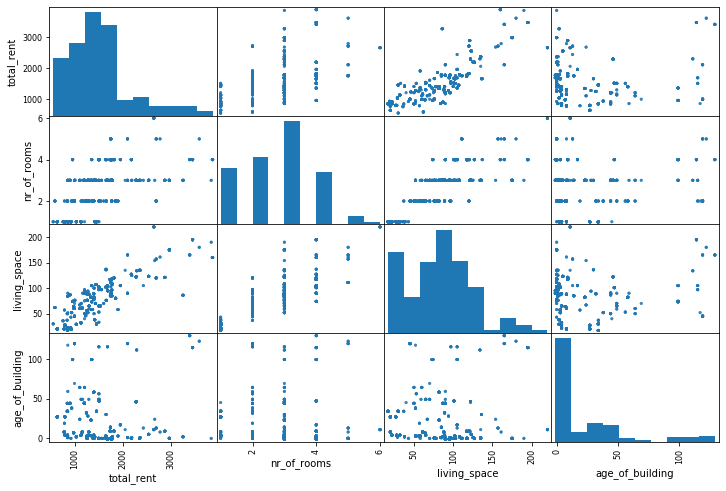

In [69]:
from pandas.plotting import scatter_matrix
attributes = ['total_rent', 'nr_of_rooms', 'living_space', 'age_of_building']
scatter_matrix(df[attributes], figsize=(12,8))

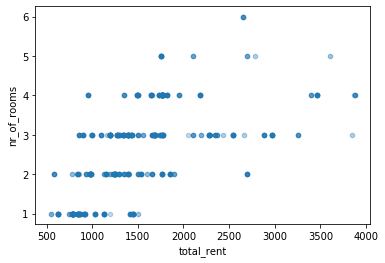

In [70]:
df.plot(kind='scatter', x='total_rent', y='nr_of_rooms', alpha=0.1)

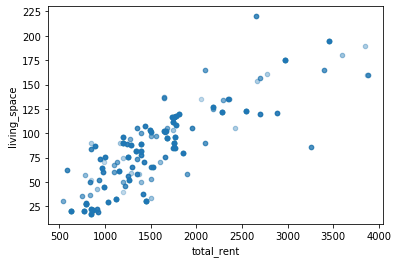

In [71]:
df.plot(kind='scatter', x='total_rent', y='living_space', alpha=0.1)

# Data Cleaning

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df.head()

,index,total_rent,living_space,nr_of_rooms,building_type,age_of_building,zip_code,region,street,latitude,longitude,rent_category
0,0,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532,2500
1,1,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532,2500
2,2,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532,2500
3,3,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283,500
4,4,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283,500


In [73]:
# Feature Scaling
features = train_set.drop('total_rent', axis=1)
housing_labels = train_set['total_rent'].copy()

In [104]:
def data_cleaning(dataset, is_fit_transform):
    discarded_attr = ['street']
    numerical_attr = ['living_space', 'nr_of_rooms', 'age_of_building', 'zip_code', 'latitude', 'longitude']
    category_attr = ['building_type', 'region']
    
    #drop discarded dataset
    dataset.drop(discarded_attr, axis = 1)
    
    #pipeline for numerical dataset, by using median to replace missing values
    #transform data in right order by using standardsclaer
    numerical_pipeline = Pipeline([
        ('numerical_imputer', SimpleImputer(strategy='median')),
        ('standard_scaler', StandardScaler())
    ])
    
    #pipeline for non-numerical dataset, by using most frequent data to replace missing values
    #transform data into numerical data, so it is easier to do data analysis for machine learning
    category_pipeline = Pipeline([
        ('category_imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder())
    ])

    #single transformer to handle all columns by using ColumnTransformer
    full_pipeline = ColumnTransformer([
        ('numerical', numerical_pipeline, numerical_attr),
        ('category', category_pipeline, category_attr)
    ])
    
    #fit: imputer is estimator; compute the median, most_frequent of the dataset
    #transform: the dataset to transform as a parameter and returns the transformed dataset
    #pipeline: passing output of each call as the parameter until it reaches the final estimator
    #          for the last, it calls the fit method only!
    if is_fit_transform == 1:
        return full_pipeline.fit_transform(dataset)
    elif is_fit_transform == 0:
        return full_pipeline.transform(dataset)


In [113]:
    discarded_attr = ['street']
    numerical_attr = ['living_space', 'nr_of_rooms', 'age_of_building', 'zip_code', 'latitude', 'longitude']
    category_attr = ['building_type', 'region']
    
    #drop discarded dataset
    dataset = df.drop(discarded_attr, axis = 1)
    
    #pipeline for numerical dataset, by using median to replace missing values
    #transform data in right order by using standardsclaer
    numerical_pipeline = Pipeline([
        ('numerical_imputer', SimpleImputer(strategy='median')),
        ('standard_scaler', StandardScaler())
    ])
    
    #pipeline for non-numerical dataset, by using most frequent data to replace missing values
    #transform data into numerical data, so it is easier to do data analysis for machine learning
    category_pipeline = Pipeline([
        ('category_imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder())
    ])

    #single transformer to handle all columns by using ColumnTransformer
    full_pipeline = ColumnTransformer([
        ('numerical', numerical_pipeline, numerical_attr),
        ('category', category_pipeline, category_attr)
    ])

In [114]:
# apply fit_transform for the training model, so is_fit_transform=1
housing_prepared = data_cleaning(features,1)

# Select and Train a model

In [115]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
# Test regression model
some_data = features.iloc[:5]
some_labels = housing_labels.iloc[:5]
# apply transform for the test data, so is_fit_transform=0
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions: ', lin_reg.predict(some_data_prepared))
print('Labels: ', list(some_labels))


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [84]:
from sklearn.metrics import mean_squared_error

# model is off by about 600€ on average -> underfitting
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

292.81181414123444

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit()